# Tenaris Full Stack Data Science Assignment

Candidate: BARBARA RANGHETTI

DOMAIN COMPREHENSION: All the features involved in the analysis are physical quantities, usually characterized by a continuous spectrum of possible values. A frequency plot will be made in the following lines in order to check this property. 

# Data Exploration

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

After having downloaded the tables regressors and target in csv format from the relational database, I create two dataframes, assigning to each column the name specified in the assignment (I previously checked that they had the same order in the database table). For each dataframe, I make a preliminar inspection, showing the first five rows, the number of records and the datatypes of the values. 

In [2]:
df1 = pd.read_csv('regressors.csv', names=['ID','AT','V','AP','RH'])
df2 = pd.read_csv('target', names=['ID','PE'])

In [3]:
df1.head()

,ID,AT,V,AP,RH
0,0,8.34,40.77,1010.84,90.01
1,1,23.64,58.49,1011.40,74.20
2,2,29.74,56.90,1007.15,41.91
3,3,19.07,49.69,1007.22,76.79
4,4,11.80,40.66,1017.13,97.20


In [4]:
print('number of records of regressor df: ',len(df1))

number of records of regressor df:  9565


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9565 entries, 0 to 9564
Data columns (total 5 columns):
ID    9565 non-null int64
AT    9564 non-null float64
V     9565 non-null float64
AP    9565 non-null float64
RH    9565 non-null float64
dtypes: float64(4), int64(1)
memory usage: 373.7 KB


Using the decribe method I start making a more quantitave exploration of the data. 

In [6]:
df1.describe()

,ID,AT,V,AP,RH
count,9565.000000,9564.000000,9565.000000,9565.000000,9565.000000
mean,4784.968636,19.651344,54.303901,1023.660522,73.309432
std,2761.375772,7.452641,12.709401,1017.245438,14.601193
min,0.000000,1.810000,25.360000,992.890000,25.560000
25%,2394.000000,13.510000,41.740000,1009.100000,63.330000
50%,4785.000000,20.345000,52.080000,1012.940000,74.970000
75%,7176.000000,25.720000,66.540000,1017.260000,84.830000
max,9567.000000,37.110000,81.560000,100499.000000,100.160000


In [7]:
df2.head()

,ID,PE
0,0,480.48
1,1,NaN
2,2,438.76
3,3,453.09
4,4,464.43


In [8]:
print('number of records of target df: ',len(df2))

number of records of target df:  9565


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9565 entries, 0 to 9564
Data columns (total 2 columns):
ID    9565 non-null int64
PE    9564 non-null float64
dtypes: float64(1), int64(1)
memory usage: 149.5 KB


In [10]:
df2.describe()

,ID,PE
count,9565.000000,9564.000000
mean,4784.937271,501.074896
std,2761.428411,4567.672457
min,0.000000,420.260000
25%,2394.000000,439.750000
50%,4785.000000,451.605000
75%,7176.000000,468.435000
max,9567.000000,447150.000000


I take a quick look to the missing values of the two dataframes, if present. I will wait to merge them, before deciding how to handle them.

In [11]:
null_data = df1[df1.isnull().any(axis=1)]
null_data

,ID,AT,V,AP,RH
3888,3891,NaN,35.76,1019.71,62.26


In [12]:
null_data = df2[df2.isnull().any(axis=1)]
null_data

,ID,PE
1,1,NaN


I execute the merge of the dataframes on the key ID. I execute a 'regressors left join targets', so that all the values of power not associated to a set of values (AT,V,AP,RH) are automatically dropped. 

In [13]:
df = pd.merge(df1,df2,how='left',on=['ID'])

In [14]:
df.head()

,ID,AT,V,AP,RH,PE
0,0,8.34,40.77,1010.84,90.01,480.48
1,1,23.64,58.49,1011.40,74.20,NaN
2,2,29.74,56.90,1007.15,41.91,438.76
3,3,19.07,49.69,1007.22,76.79,453.09
4,4,11.80,40.66,1017.13,97.20,464.43


In [15]:
print('number of records of the merged df:', len(df))

number of records of the merged df: 9565


In [16]:
null_data = df[df.isnull().any(axis=1)]
null_data

,ID,AT,V,AP,RH,PE
1,1,23.64,58.49,1011.40,74.20,NaN
197,200,27.18,62.66,1009.89,52.83,NaN
198,201,25.56,50.05,1005.67,69.29,NaN
199,202,19.69,39.72,1001.49,60.34,NaN
3888,3891,NaN,35.76,1019.71,62.26,473.48


In [17]:
df.isnull().sum()

ID    0
AT    1
V     0
AP    0
RH    0
PE    4
dtype: int64

As shown both in the dataframe visualisation and in the list above, there is one atmosferic temperature missing value, and four power missing values (one already present in the target table, other three deriving from the left join). Since they represent less than 0.05% of the dataset values, dropping them or replacing them will not apport a significative information. Since the values are continuous, I choose the interpolate method to replace them. 

In [18]:
df_filled = df.interpolate()
df_fil = df_filled.drop('ID',axis=1)

I produce now the scatter matrix of the features with a visual representation of the scatterplots and of the frequency distributions. The possible presence of significative outliers will be easily detected even at this qualitative and visual stage.

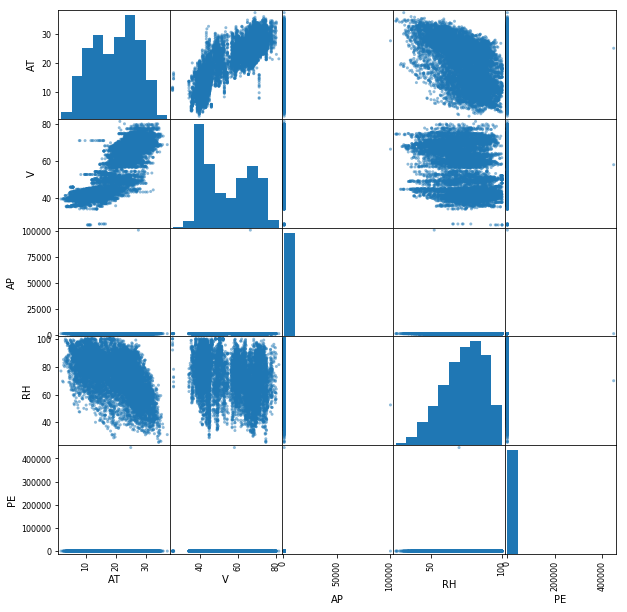

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_fil, figsize=(10, 10))
plt.show()

There are outliers for both power and atmosferic pressure. I produce the boxplots and I filter the dataframe in order to understand how many are exactly the outliers. For the filtering, I choose a threshold value, based on the the plots above. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1a16dc23c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a16dc2a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a16dc2278>],
 'medians': [<matplotlib.lines.Line2D at 0x1a16dcc160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a16dcc4a8>],
 'means': []}

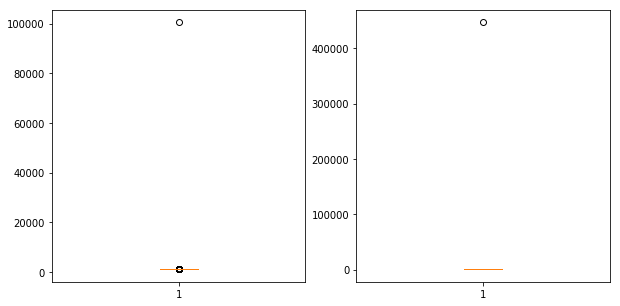

In [20]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.boxplot(df_fil['AP'])
ax2 = fig.add_subplot(1,2,2)
ax2.boxplot(df_fil['PE'])

In [21]:
df_fil[df_fil['PE']>10000]

,AT,V,AP,RH,PE
94,24.98,58.05,1011.69,69.97,447150.0


In [22]:
df_fil[df_fil['AP']>80000]

,AT,V,AP,RH,PE
3879,27.52,66.48,100499.0,52.54,429.67


In [23]:
power_outlier = df_fil['PE'].max()
atm_pressure_outlier = df_fil['AP'].max()
df3 = df_fil[df_fil['PE']!= df_fil['PE'].max()]
df4 = df3[df3['AP']!= df3['AP'].max()]

print('Power:')
print('mean value outlier removed: %.1f'%df4['PE'].mean())
print('power outlier value:', power_outlier)
print('outlier-mean ratio: %.1f' %(power_outlier/df4['PE'].mean()))
print('- - - - - - - - - - - - - - - - - - -')
print('Atmosferic Pressure:')
print('mean value outlier removed: %.1f'%df4['AP'].mean())
print('power outlier value:', atm_pressure_outlier)
print('outlier-mean ratio: %.1f' %(atm_pressure_outlier/df4['AP'].mean()))

Power:
mean value outlier removed: 454.4
power outlier value: 447150.0
outlier-mean ratio: 984.1
- - - - - - - - - - - - - - - - - - -
Atmosferic Pressure:
mean value outlier removed: 1013.3
power outlier value: 100499.0
outlier-mean ratio: 99.2


Power outlier is about three order of magnitude bigger than the mean value of the power computed after removing it. It seems quiet impossible that a particular combination of the features can cause such an explosion in the value of the power, so I drop it using the filtered dataframe. The same logic can be applied to the atmosferic pressure outlier, that is two order of magnitude bigger than the mean value. 

I call the describe method and reproduce the scatter matrix of the final dataframe. 

In [24]:
df4.describe()

,AT,V,AP,RH,PE
count,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000
mean,19.649996,54.302236,1013.259667,73.311953,454.373473
std,7.452397,12.710062,5.939330,14.601135,17.067883
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.335000,439.755000
50%,20.340000,52.080000,1012.940000,74.980000,451.620000
75%,25.720000,66.540000,1017.260000,84.835000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


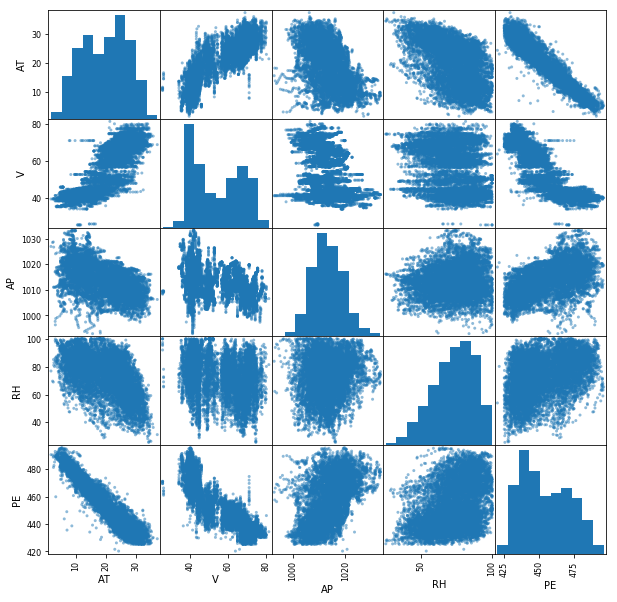

In [25]:
from pandas.plotting import scatter_matrix
scatter_matrix(df4, figsize=(10, 10))
plt.show()

I reproduce the scatter plot of the power versus each feature: from the matrix is already clear that atmosferic temperature is the most correlate (negative correlation).

Text(0, 0.5, 'PE')

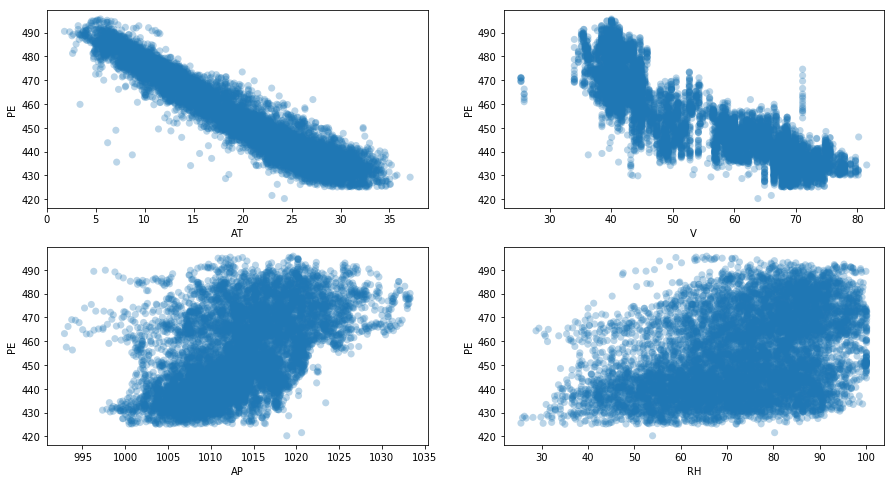

In [26]:
y = df4['PE']
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(df4['AT'],y, s=50,
               alpha=0.3, edgecolors='none')
plt.xlabel('AT')
plt.ylabel('PE')
ax2 = fig.add_subplot(2,2,2)
ax2.scatter(df4['V'],y, s=50,
               alpha=0.3, edgecolors='none')
plt.xlabel('V')
plt.ylabel('PE')
ax3 = fig.add_subplot(2,2,3)
ax3.scatter(df4['AP'],y, s=50,
               alpha=0.3, edgecolors='none')
plt.xlabel('AP')
plt.ylabel('PE')
ax4 = fig.add_subplot(2,2,4)
ax4.scatter(df4['RH'],y, s=50,
               alpha=0.3, edgecolors='none')
plt.xlabel('RH')
plt.ylabel('PE')

# Multiple Linear Regression

The request of the assignment is to create a model to predict the power, given the historical dataset containing information about atmosferic temperature, vacuum, atmosferic pressure and relative humidity. Since all the features are continuous, the prediction model to be chosen is regression. This regression model involves multiple variables, so can be represented as an hyperplane:
\begin{equation}
y = \beta + m_1x_1+m_2x_2+\dots+m_nx_n +\epsilon
\end{equation}
I start importing the Scikit-Learn library. 


In [27]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [28]:
X = df4[['AT','V','AP','RH']].values
y = df4['PE'].values

I divide the dataset between the variables training set, variables test set, target training set and target test set, with a ratio training : test = 0.75 : 0.25. 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

I take a qualitative look to the training set, checking if the sample distribution has been mantained. 

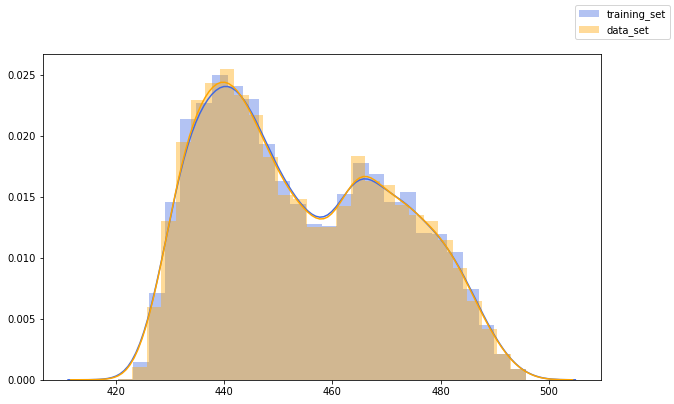

In [30]:
fig = plt.figure(figsize=(10,6))
plt.tight_layout()
sns.distplot(y_train, color='royalblue')
sns.distplot(y, color='orange')
fig.legend(labels=['training_set','data_set'])
plt.show()

Now I can train the model.

In [31]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Power can now be predicted using the test set and a quantitative comparison between the actual values of power and the predicted ones can be made in order to evaluate the accuracy of the model. As shown below, the model has reached a very high accuracy. 

In [32]:
y_pred = regressor.predict(X_test)
errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.2 %.


A qualitative comparison can be made taking the first 25 values of y_test and y_pred and plotting their bar chart.

In [33]:
df_AP = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_AP_25 = df_AP.head(25)
df_AP_25.head()

,Actual,Predicted
0,446.91,443.844354
1,480.68,477.152235
2,451.94,453.656071
3,475.77,477.685360
4,466.88,468.924005


/Users/barbararanghetti/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


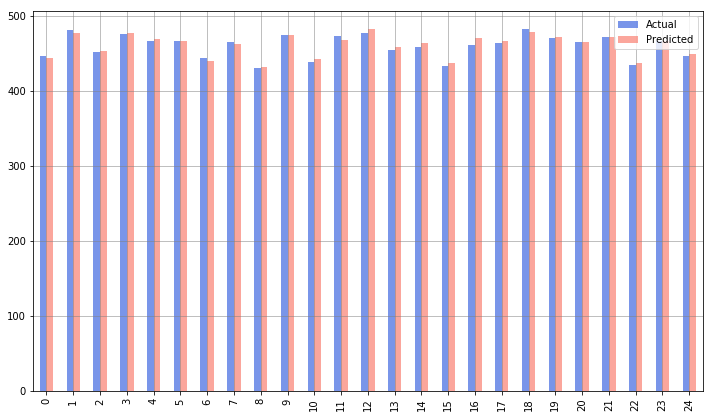

In [34]:
df_AP_25.plot(kind='bar',figsize=(12,7), colors = ['royalblue','salmon'], alpha=0.7)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Another way of checking how well the model has predicted the values can be the computation of all the deviations.

In [35]:
yPred_minus_yTest = y_pred - y_test
print('minimum deviation: ',yPred_minus_yTest.min())
print('maximum deviation: ',yPred_minus_yTest.max())
print('mean deviation: ',yPred_minus_yTest.mean())

minimum deviation:  -21.35463638770426
maximum deviation:  31.03001218362749
mean deviation:  -0.0824598024220963


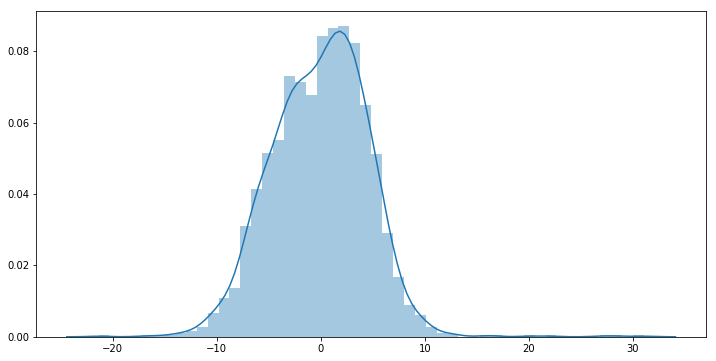

In [36]:
plt.figure(figsize=(12,6))
plt.tight_layout()
sns.distplot(yPred_minus_yTest)

Using the metric module of SciKit-Learn, it is possible to evaluate the performance of the model in terms of mean absolute error, mean squared error and variance.

In [37]:
print('Mean Absolute Error: %.2f'% metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error: %.2f' % metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error: %.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score: %.2f' % metrics.r2_score(y_test, y_pred))
perc_RMSE = 100*np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_test.mean()
print('perc_RMSE: %.2f' %perc_RMSE)

Mean Absolute Error: 3.63
Mean Squared Error: 20.83
Root Mean Squared Error: 4.56
R2 score: 0.93
perc_RMSE: 1.00


As shown, the R2 score is 0.93, since 1 is the optimal value, this is a confirmation of the goodness of the model. Moreover, the RMSE is 1.03% of the mean value of the power, which is a good result: the power is predicted with an error limited to 1%. 

The regression coefficients give an indication of which features are more important in the determination of the target value. I order them by their absolute value and I make a plot to better show the result: as already supposed from the scatter matrix, the feature on which the power depends more is atmosferic temperature.

In [38]:
print('Regression coefficients:',regressor.coef_)
print('Regression intercept: %.2f' % regressor.intercept_)

Regression coefficients: [-1.98402972 -0.22842464  0.06482104 -0.15805637]
Regression intercept: 451.65


In [39]:
regr_coeff = abs(regressor.coef_)
features = ['AT','V','AP','RH']
features_importance = []
for i in range(len(features)):
    features_importance.append((features[i],regr_coeff[i]))

sorted_feature_importance = sorted(features_importance, key = lambda x: x[1],reverse=True)
sorted_feature_importance

[('AT', 1.9840297200334562),
 ('V', 0.22842463884363262),
 ('RH', 0.1580563670419763),
 ('AP', 0.06482104218711161)]

In [40]:
variables = []
performance = []
for tup in sorted_feature_importance:
    variables.append(tup[0])
    performance.append(tup[1])

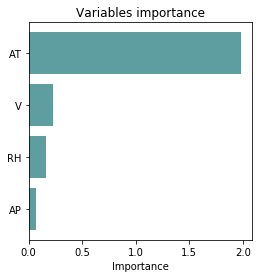

In [41]:
fig, ax = plt.subplots(figsize=(4,4))
y_pos = np.arange(len(variables))
ax.barh(y_pos, performance,color = 'cadetblue', align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis() 
ax.set_xlabel('Importance')
ax.set_title('Variables importance')

plt.show()

I can try the simple regression model considering the atmosferic temperature as the only feature.

In [42]:
X = df4['AT'].values.reshape(-1,1)
y = df4['PE'].values.reshape(-1,1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
random_state=42)

In [44]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
print('regression intercept: ',regressor.intercept_)
print('regression coefficient: ',regressor.coef_)

regression intercept:  [497.02905047]
regression coefficient:  [[-2.17151731]]


In [46]:
y_pred = regressor.predict(X_test)
errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 99.05 %.


The accuracy has decreased from 99.19% to 99.05% but has still an optimal value, meaning that the atmosferic temperature in a very good regressor.

In [47]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()

,Actual,Predicted
0,446.91,448.387063
1,480.68,480.503804
2,451.94,458.158891
3,475.77,475.965333
4,466.88,466.106644


/Users/barbararanghetti/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


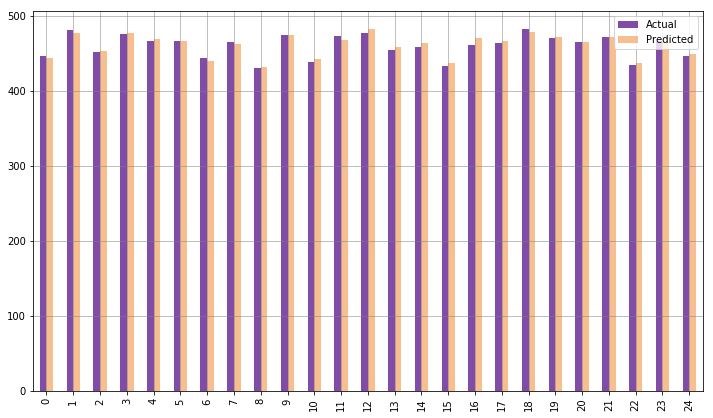

In [48]:
df_AP_25.plot(kind='bar',figsize=(12,7), colors = ['indigo','sandybrown'], alpha=0.7)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

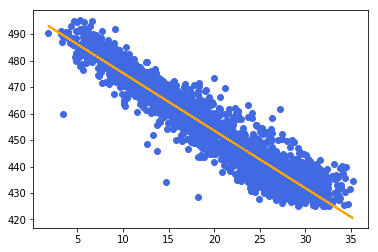

In [49]:
plt.scatter(X_test, y_test,  color='royalblue')
plt.plot(X_test, y_pred, color='orange', linewidth=2)
plt.show()

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
perc_RMSE = 100*np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_test.mean()
print('perc_RMSE: %.2f' %perc_RMSE)

Mean Absolute Error: 4.304492085358895
Mean Squared Error: 29.98346863928251
Root Mean Squared Error: 5.475716267236873
perc_RMSE: 1.21


# Random Forest Regression

Since atmosferic temperature is the most important feature in determining power (much more than the others) and the relation between PE and AT is pretty much linear (as shown in the scatterplots), multiple linear regression is the right choice. I will try the random forest regression model too, just for completeness (this tool would be much more useful if the relation was not linear).

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [58]:
X = df4[['AT','V','AP','RH']].values
y = df4['PE'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [59]:
y_pred = rf.predict(X_test)
errors = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2.36 degrees.


In [60]:
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.48 %.


As predicted, multiple linear regression was already a good choice and random forest regression has increased the accuracy from 99.19% to 99.45%.

In [61]:
df_AP = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_AP_25 = df_AP.head(25)
df_AP_25.head()

,Actual,Predicted
0,446.91,442.6073
1,480.68,482.5705
2,451.94,451.1497
3,475.77,475.4493
4,466.88,467.8288


/Users/barbararanghetti/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


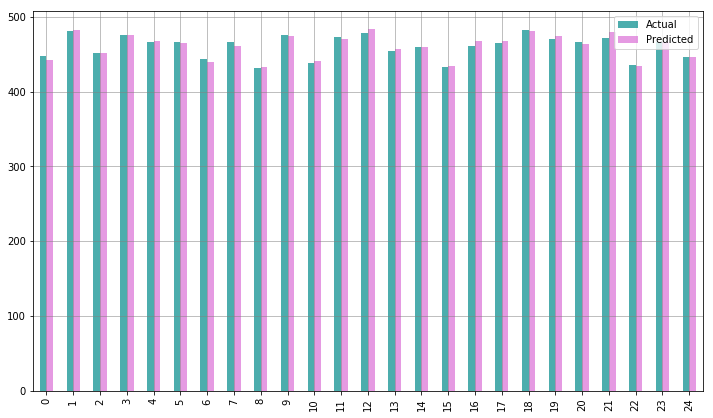

In [62]:
df_AP_25.plot(kind='bar',figsize=(12,7), colors = ['darkcyan','orchid'], alpha=0.7)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [63]:
yPred_minus_yTest = y_pred - y_test

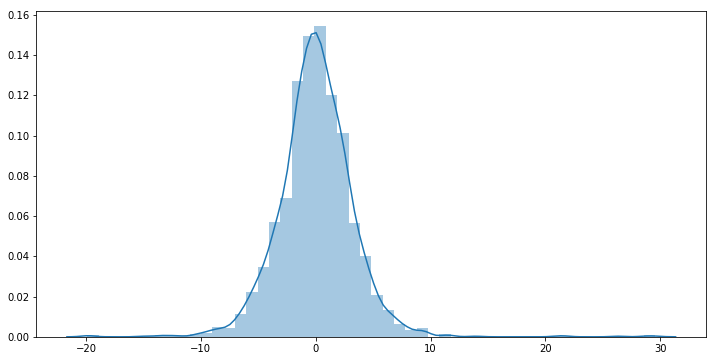

In [64]:
plt.figure(figsize=(12,6))
plt.tight_layout()
sns.distplot(yPred_minus_yTest)

It is possibile to reproduce graphically one of the decision trees (you can find it in the GitHub repository): I choose, without any particular reason, the 6th. As you can see in the file.png, most of the split are done according to atmosferic temperature values.

In [65]:
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [66]:
tree_small = rf_small.estimators_[5]
tree_small

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=922312633, splitter='best')

In [67]:
from sklearn.tree import export_graphviz
feature_list = ['AT','V','AP','RH']
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

In [68]:
import pydot
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

As done for the previuous model, I check the importance of the features: as expected atmosferic temperature is still the most important.

In [69]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('AT', 0.89), ('V', 0.07), ('AP', 0.02), ('RH', 0.02)]

In [70]:
variables = []
performance = []
for tup in feature_importances:
    variables.append(tup[0])
    performance.append(tup[1])

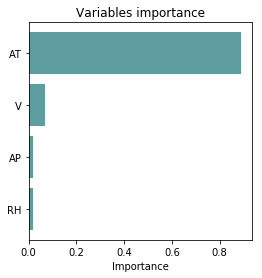

In [71]:
fig, ax = plt.subplots(figsize=(4,4))
y_pos = np.arange(len(variables))

ax.barh(y_pos, performance,color = 'cadetblue', align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis() 
ax.set_xlabel('Importance')
ax.set_title('Variables importance')

plt.show()

# Conclusions

The prediction of the power has been done using four features and a multiple regression model, with a 99.19% of accuracy. Only one of the feature (atmosferic temperature) has a significative influence on the power and the linear regression can be done with this feature only, with a 99.05% of accuracy.